# Задание 1.
Задана функция 𝑓(𝑋)=14−0.05⋅𝑥

## Задача 1. 

На данных своего варианта (см. второй столбец таблицы с вариантами) повторить расчёты и построить графики из первой лабораторной. Пояснить выбор наилучшего количества степеней свободы.
## Задача 2.

Повторить расчёты, меняя характеристики согласно своему варианту (см. последний столбец таблицы с вариантами). Проанализировать, как меняется MSE при изменении характеристик.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pandas import DataFrame
import rpy2.robjects as robjects

Для начала возьмем 60 наблюдений.

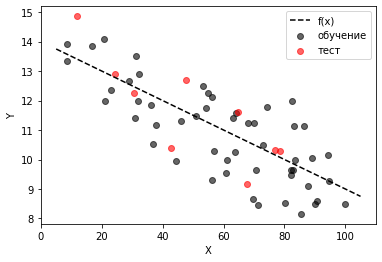

In [ ]:
np.random.seed(20)

n_all, train_percent = 60, 0.85

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent), replace=False)

def y_func (x) :
    return(14 - 5e-02*x)
    
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)

plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)

plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(x)')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [ ]:
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

r_smooth_spline = robjects.r['smooth.spline']

In [ ]:
max_df = 40

MSE_all_dfs = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs = DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

for i_df in range(2, max_df+1) :
        
    fit = r_smooth_spline(x=r_x, y=r_y, df=i_df)
    
    y_train_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_train)).rx2('y'))
    
    y_test_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_test)).rx2('y'))
    
    MSE_all_dfs.loc[i_df, 'MSE_train'] = \
        sum((y_train - y_train_hat)**2) / len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = \
        sum((y_test - y_test_hat)**2) / len(y_test_hat)
        
MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
15,0.732782,0.667873


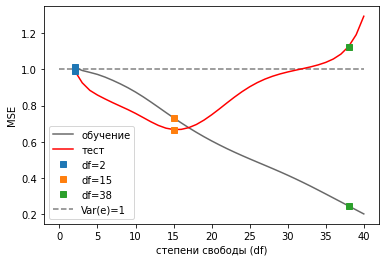

In [ ]:
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], 
                  MSE_all_dfs.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([15, 15], [MSE_all_dfs.iloc[13]['MSE_train'], 
                  MSE_all_dfs.iloc[13]['MSE_test']],
         ls='', marker='s', label='df=15')
plt.plot([38, 38], [MSE_all_dfs.iloc[36]['MSE_train'], 
                    MSE_all_dfs.iloc[36]['MSE_test']],
         ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')

plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')

plt.legend(loc='best')
plt.show()

Наблюдаю наименьшее MSE для теста в значении степеней свободы равном 15, при больших значениях степеней свободы наблюдается переобучение

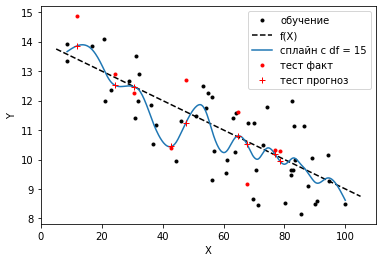

In [ ]:
my_df = 15

x_train_lin = np.linspace(min(x_train), max(x_train), num=500, 
                          endpoint=True)

fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

plt.plot(x_train, y_train, color='black', ls='', marker='.', 
         label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', 
         label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', 
         label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', 
         label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', 
         label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

MSE_fit = [sum((y_train - y_hat_train)**2) / len(y_train), 
           sum((y_test - y_hat_test)**2) / len(y_test)]

In [ ]:
np.around(MSE_fit, 2)

array([0.73, 0.67])


# Теперь посмотрим, что будет при увелечии числа наблюдений до 850


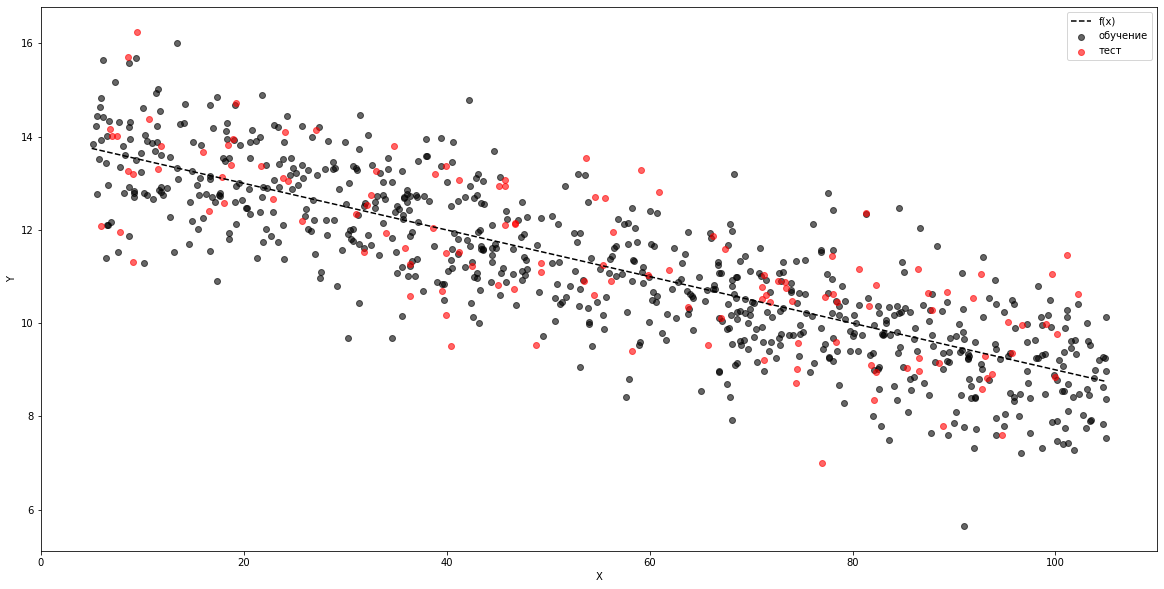

In [ ]:
np.random.seed(20)

n_all, train_percent = 850, 0.85

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent), replace=False)

def y_func (x) :
    return(14 - 5e-02*x)
    
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)

plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(x)')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [ ]:
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

r_smooth_spline = robjects.r['smooth.spline']

In [ ]:
max_df = int((2/3)*850)

MSE_all_dfs = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs = DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

for i_df in range(2, max_df+1) :
        
    fit = r_smooth_spline(x=r_x, y=r_y, df=i_df)
    
    y_train_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_train)).rx2('y'))
    
    y_test_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_test)).rx2('y'))
    
    MSE_all_dfs.loc[i_df, 'MSE_train'] = \
        sum((y_train - y_train_hat)**2) / len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = \
        sum((y_test - y_test_hat)**2) / len(y_test_hat)
        
MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
4,0.953395,1.290648


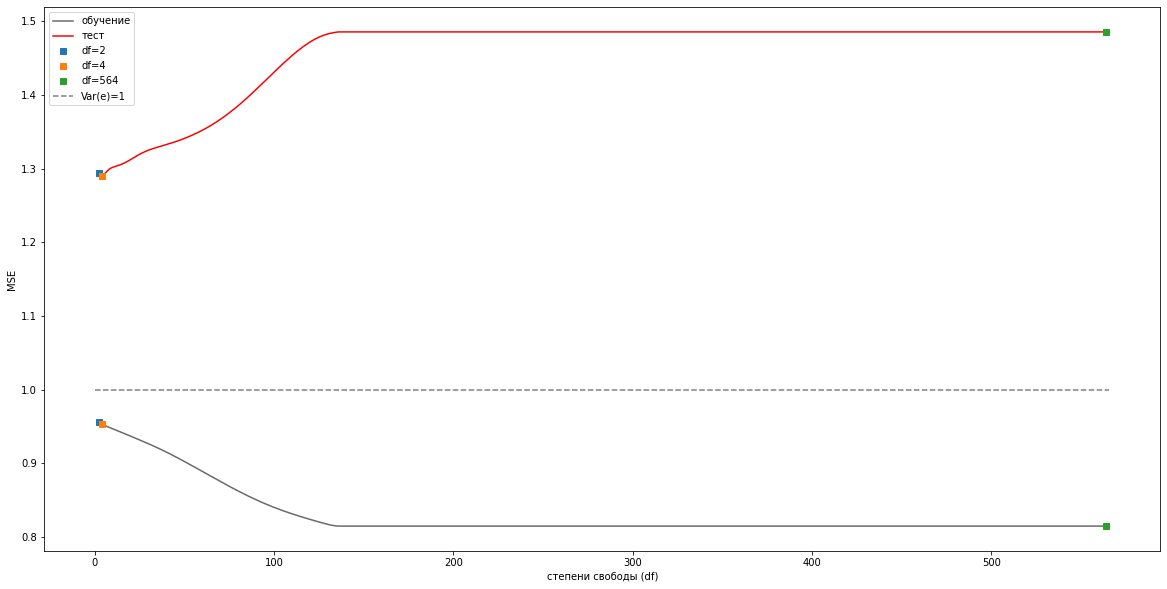

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], 
                  MSE_all_dfs.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([4, 4], [MSE_all_dfs.iloc[2]['MSE_train'], 
                  MSE_all_dfs.iloc[2]['MSE_test']],
         ls='', marker='s', label='df=4')
plt.plot([564, 564], [MSE_all_dfs.iloc[562]['MSE_train'], 
                    MSE_all_dfs.iloc[562]['MSE_test']],
         ls='', marker='s', label='df=564')
plt.hlines(1, 0, 566, linestyles='dashed', color='grey', label='Var(e)=1')

plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')

plt.legend(loc='best')
plt.show()

Наблюдаю наименьшее MSE для теста в значении степеней свободы равном 4


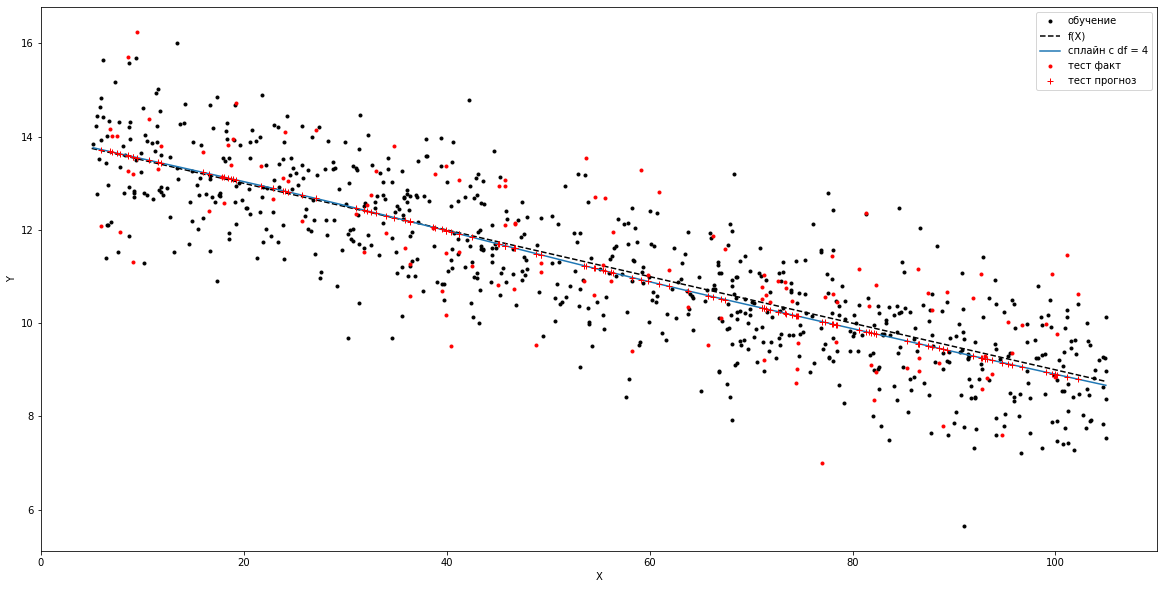

In [ ]:
my_df = 4

x_train_lin = np.linspace(min(x_train), max(x_train), num=300, 
                          endpoint=True)

r_smooth_spline = robjects.r['smooth.spline']

fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

plt.figure(figsize=(20,10))
plt.plot(x_train, y_train, color='black', ls='', marker='.', 
         label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', 
         label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', 
         label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', 
         label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', 
         label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

MSE_fit = [sum((y_train - y_hat_train)**2) / len(y_train), 
           sum((y_test - y_hat_test)**2) / len(y_test)]

# Теперь при увеличении до 900 наблюдений

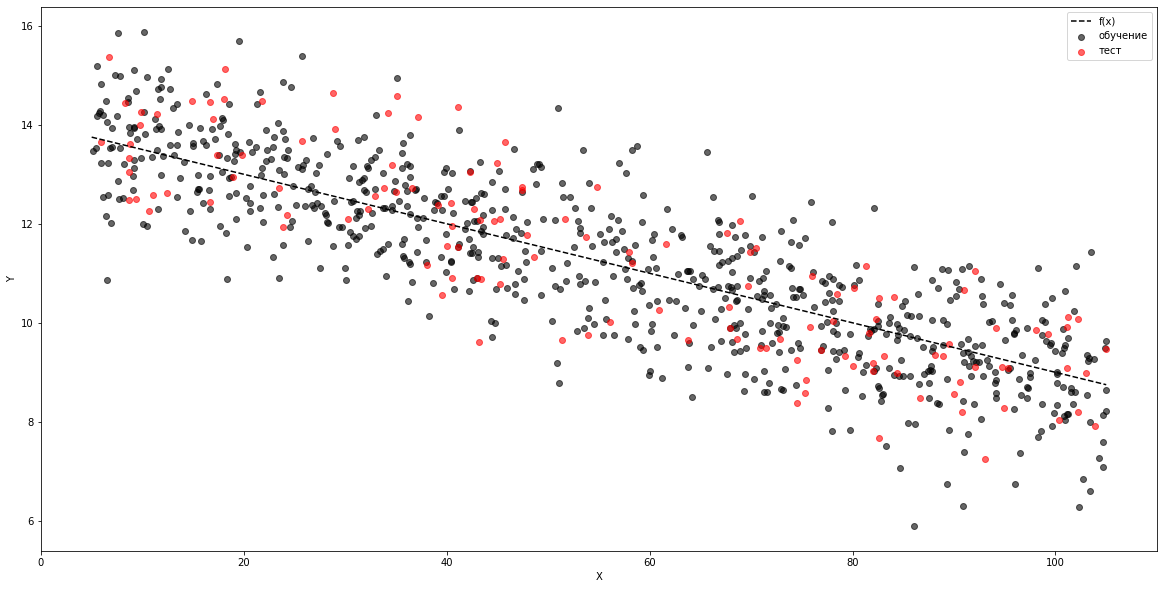

In [ ]:
np.random.seed(20)

n_all, train_percent = 900, 0.85

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent), replace=False)

def y_func (x) :
    return(14 - 5e-02*x)
    
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)

plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(x)')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [ ]:
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

r_smooth_spline = robjects.r['smooth.spline']

In [ ]:
max_df = int((2/3)*900)

MSE_all_dfs = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs = DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

for i_df in range(2, max_df+1) :
        
    fit = r_smooth_spline(x=r_x, y=r_y, df=i_df)
    
    y_train_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_train)).rx2('y'))
    
    y_test_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_test)).rx2('y'))
    
    MSE_all_dfs.loc[i_df, 'MSE_train'] = \
        sum((y_train - y_train_hat)**2) / len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = \
        sum((y_test - y_test_hat)**2) / len(y_test_hat)
        
MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
7,0.994731,1.007534


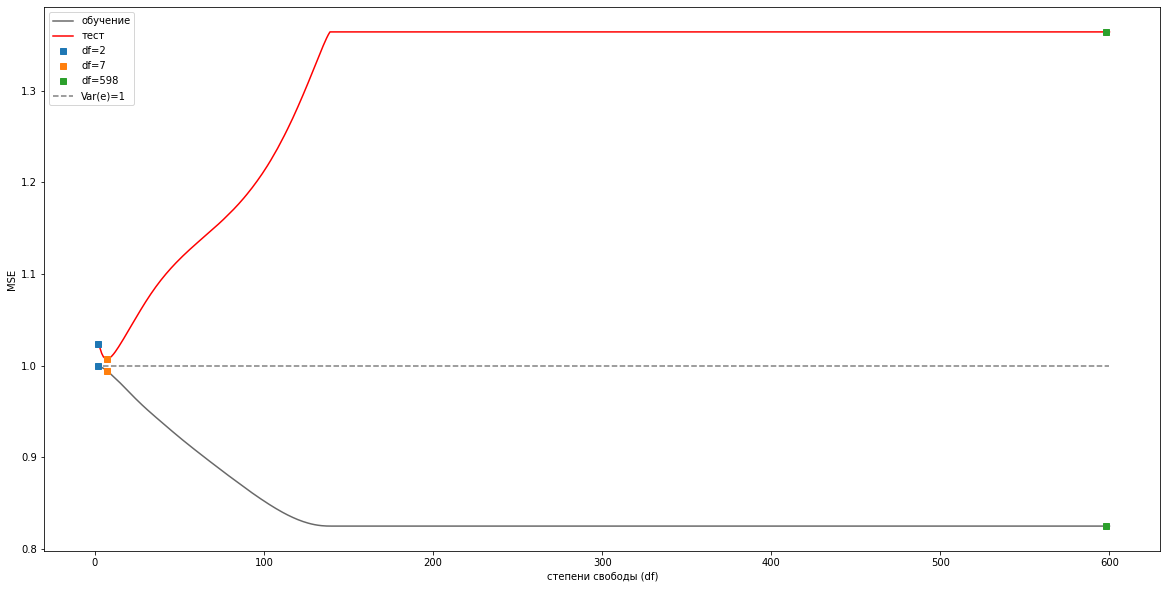

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], 
                  MSE_all_dfs.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([7, 7], [MSE_all_dfs.iloc[5]['MSE_train'], 
                  MSE_all_dfs.iloc[5]['MSE_test']],
         ls='', marker='s', label='df=7')
plt.plot([598, 598], [MSE_all_dfs.iloc[596]['MSE_train'], 
                    MSE_all_dfs.iloc[596]['MSE_test']],
         ls='', marker='s', label='df=598')
plt.hlines(1, 0, 600, linestyles='dashed', color='grey', label='Var(e)=1')

plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')

plt.legend(loc='best')
plt.show()

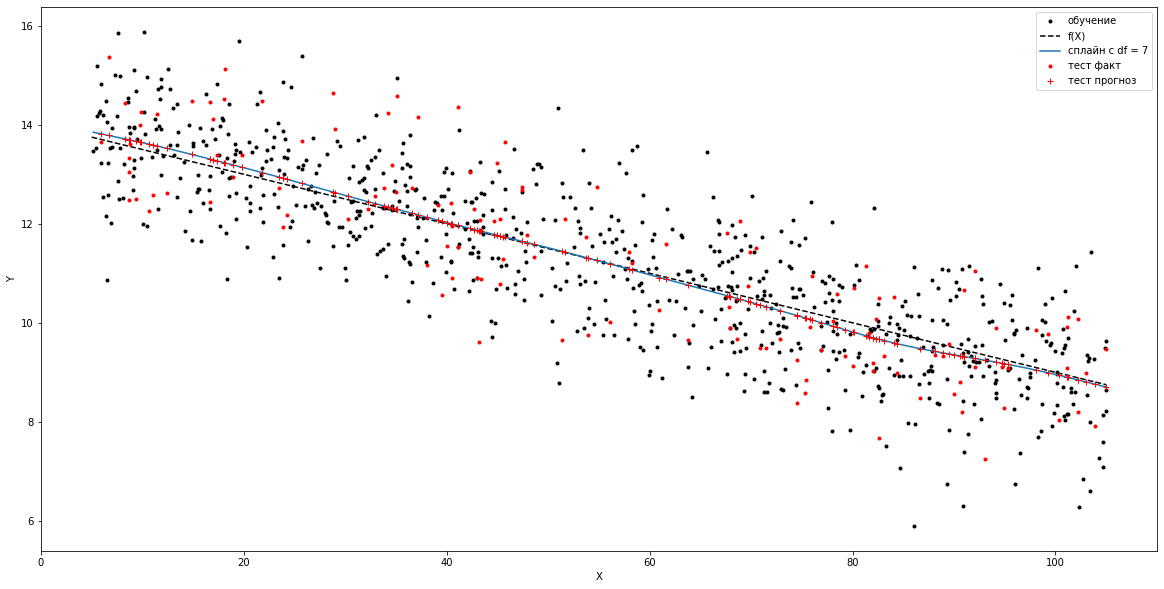

In [ ]:
my_df = 7

x_train_lin = np.linspace(min(x_train), max(x_train), num=300, 
                          endpoint=True)

fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

plt.figure(figsize=(20,10))
plt.plot(x_train, y_train, color='black', ls='', marker='.', 
         label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', 
         label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', 
         label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', 
         label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', 
         label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

MSE_fit = [sum((y_train - y_hat_train)**2) / len(y_train), 
           sum((y_test - y_hat_test)**2) / len(y_test)]

# Увеличим количество наблюдений до 950

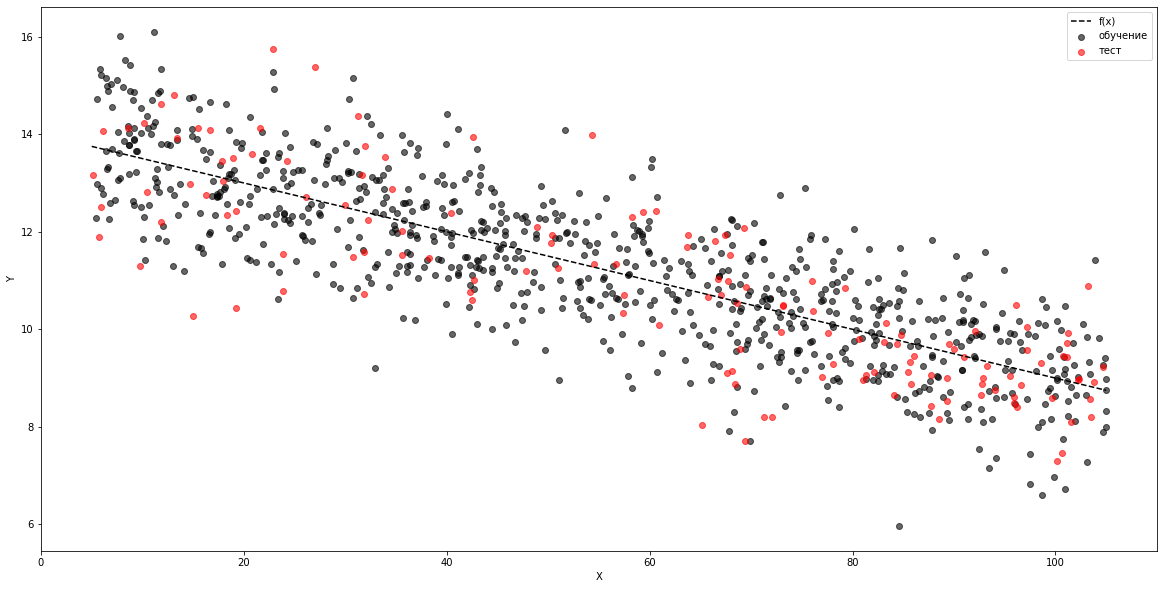

In [ ]:
np.random.seed(20)

n_all, train_percent = 950, 0.85

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent), replace=False)

def y_func (x) :
    return(14 - 5e-02*x)
    
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)

plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(x)')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [ ]:
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

r_smooth_spline = robjects.r['smooth.spline']

In [ ]:
max_df = int((2/3)*950)

MSE_all_dfs = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs = DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

for i_df in range(2, max_df+1) :
        
    fit = r_smooth_spline(x=r_x, y=r_y, df=i_df)
    
    y_train_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_train)).rx2('y'))
    
    y_test_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_test)).rx2('y'))
    
    MSE_all_dfs.loc[i_df, 'MSE_train'] = \
        sum((y_train - y_train_hat)**2) / len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = \
        sum((y_test - y_test_hat)**2) / len(y_test_hat)
        
MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
42,0.953858,1.183265


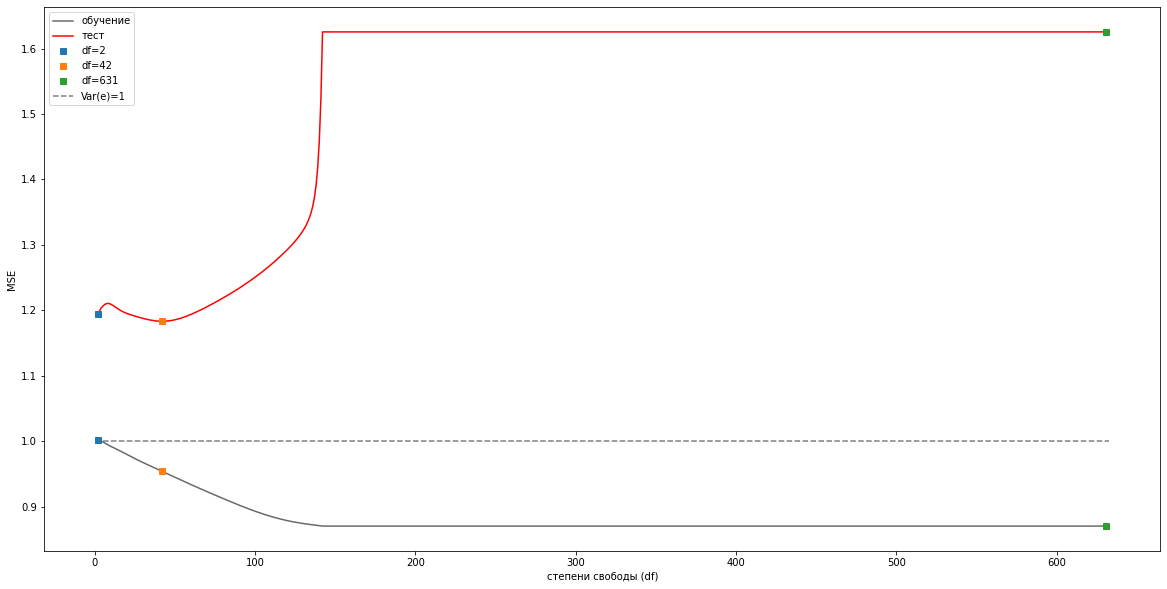

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], 
                  MSE_all_dfs.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([42, 42], [MSE_all_dfs.iloc[40]['MSE_train'], 
                  MSE_all_dfs.iloc[40]['MSE_test']],
         ls='', marker='s', label='df=42')
plt.plot([631, 631], [MSE_all_dfs.iloc[629]['MSE_train'], 
                    MSE_all_dfs.iloc[629]['MSE_test']],
         ls='', marker='s', label='df=631')
plt.hlines(1, 0, 633, linestyles='dashed', color='grey', label='Var(e)=1')

plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')

plt.legend(loc='best')
plt.show()

Наблюдаю наименьшее MSE для теста в значении степеней свободы равном 42

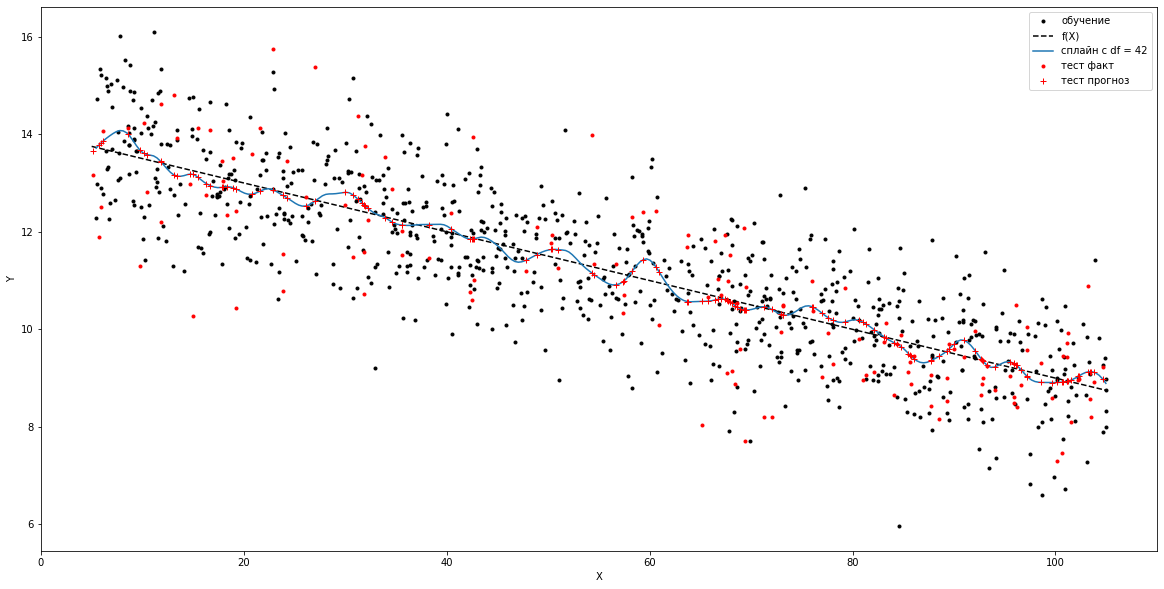

In [ ]:
my_df = 42

x_train_lin = np.linspace(min(x_train), max(x_train), num=300, 
                          endpoint=True)

fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

plt.figure(figsize=(20,10))
plt.plot(x_train, y_train, color='black', ls='', marker='.', 
         label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', 
         label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', 
         label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', 
         label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', 
         label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

MSE_fit = [sum((y_train - y_hat_train)**2) / len(y_train), 
           sum((y_test - y_hat_test)**2) / len(y_test)]

Результаты MSE на train и test:

1. 60 - 0.73, 0.67
2. 850 - 0.95, 1.3
3. 900 - 0.99, 1.007
4. 950 - 0.95
, 1.18